# Filtration of a Yeast Suspension

**Prepared by**: Hailey Lynch (hlynch@nd.edu) and Wilson Raney (wraney@nd.edu)

**Reference**: Example 11.1 in Bioprocess Engineering: Basic Concepts, 3rd Edition by Shuler, Kargi, and DeLisa (ISBN-10: 0137062702) (2017)

> This problem will illustrate a filtration of a yeast suspension example for undergraduates to practice solving analyical solutions, developing Python code, and discussing critical thinking questions using concepts from CBE 60258.

## Learning Objectives
After completing this notebook and working through through the activities, you should be able to:

* Write and solve systems of differential equations and quadratic functions on paper and use Python for a simple separations example in chemical engineering.
* Develop a mathematical model on paper and implement in Python to calculate solutions using numerical methods.
* Interpret results and discuss critical thinking questions.

**Specific CBE 60258 notebooks utilized throughout this notebook:**
* (Section 1.4) Systems of Differential Equations: https://ndcbe.github.io/data-and-computing/notebooks/07/Systems-of-Differential-Equations-and-Scipy.html#systems-of-differential-equations

* (Section 1.5) Visualization with matplotlib: https://ndcbe.github.io/data-and-computing/notebooks/01/Matplotlib.html#customizing-plots


* (Section 1.5) Visualizing Data: https://ndcbe.github.io/data-and-computing/notebooks/09/Visualizing-Data.html#scatter-plots

* (Section 1.8) Newton-Raphson Method in One Dimension: https://ndcbe.github.io/data-and-computing/notebooks/06/Newton-Raphson-Method-in-One-Dimension.html



In [ ]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import math

## Problem Statement
The following data were obtained in a constant-pressure filtration unit for filtration of a yeast suspension:

t (min)            | V (L filtrate) 
-------------------|------------------
4                  | 115 
20                 | 365 
48                 | 680
76                 | 850 
120                | 1130 

		
Characteristics of the filter are as follows:<br>
$A = 0.28 m^2$, $C = 1920 kg/m^3$, $𝜇 = 2.9ᐧ10^{-3} kg/mᐧs$, $𝛼 = 4 m/kg$  

1.   Determine the pressure drop across the filter.
2.   Determine the filter medium resistance ($r_{m}$).
3.   Determine the size of the filter for the same pressure drop to process 4000 L of cell suspension in 20 minutes.

**Do the following throughout this notebook:**
1. Propose a mathematical model for the given problem statement.
2. Solve the problem analytically.
3. Write pseudocode before using Python.
4. Solve the problem using Python.
5. Print answers to the screen.
6. Answer discussion questions.

## Governing Equations for the Filtration System

Consider the following for separation of constant-pressure filtration:

For filtration, the **rate** (*the flow of filtrate*) for a **constant-pressure** (*vacuum*) filtration operation is determined by the **resistance of the cake** and the **filter medium**. <br><br> We can understand this by setting up a differential equation to model this relationship:

$$Equation (11.1):\frac{dV}{dt} = \frac{g_{c}ΔPA}{(r_{m}+r_{c})𝜇}$$

where:


$V$ = the volume of filtrate

$A$ = the surface area of the filter

$ΔP$ = the pressure-drop through the cake and filter medium

$𝜇$ = the viscosity of the filtrate

$r_{m}$ = the resistance of the filter medium

$r_{c}$ = the resistance of the cake


---

The value of $r_{m}$ is characterisitc of the filter medium. However the cake resistance $r_{c}$, increases during filtration and after a start-up period, $r_{c}$ exceeds $r_{m}$. The value of $r_{c}$ is given by:

$$ Equation (11.2): r_{c} = 𝛼\frac{W}{A} = 𝛼\frac{CV}{A} $$

where:

$W$ = the total weight of the cake on filter

$C$ = the weight of the cake deposited per unit volume of filtrate

$𝛼$ = the average specific resistance of the cake

---

The total weight of the cake is related to the total volume of filtrate and can be characterized by:
<br><br>
$$Equation (11.3): W = CV$$

where:

$W$ = the total weight of the cake on filter

$C$ = the weight of the cake deposited per unit volume of filtrate

$V$ = the volume of filtrate


## Describe the Filtration System Analytically



With the information given in 1.3, we can now use these equations to define the mathematical relationship to solve the problem.

Use the previous three equations (11.1), (11.2), and (11.3) to analytically derive the Ruth equation: <br><br>$$ Equation (11.6): \frac{t}{V} = \frac{1}{K}(V+2V_{0})$$ <br>
where $V_{0}$ and $K$, the Ruth coefficient, are defined as:<br><br>
$V_{0} = \frac{r_{m}}{𝛼C}A$ and $K = (\frac{2A^{2}}{𝛼C𝜇})Δpg_{c}$ <br>

<b> Record your answer using pencil and paper. </b>

>**Hint**: You will need to solve for two equations (11.4) and (11.5) before deriving the Ruth equation. <br>
<br>How can you transform a differential equation into a linear equation? <br> What bounds of $V$ and $t$ will you need to integrate within?

**Paper and Pencil Solution:** <br><br>
Substituting Equations (11.2) and (11.3) into Equation (11.1) we get:
<br><br>
$$Equation (11.4):
\frac{d(V/A)}{dt} = \frac{g_{c}Δp}{(r_{m}+𝛼\frac{CV}{A})𝜇} $$
<br>

Integrating Equation 11.4 from $V=0$ to $V=V$ and $t=0$ and $t=t$ gives:
<br><br>
$$Equation (11.5):
V^{2}+2VV_{0}=Kt$$

where $V_{0}$ and $K$ are defined as:

$$V_{0} = \frac{r_{m}}{𝛼C}A$$

and

$$K = (\frac{2A^{2}}{𝛼C𝜇})Δpg_{c}$$

For a constant-pressure filtration, 11.5 is known as the Ruth equation and we can rearrange it to get:
<br><br>
$$Equation (11.6):
\frac{t}{V} = \frac{1}{K}(V+2V_{0})$$

The integration performed here could also be modeled in Python as outlined in this notebook: (https://ndcbe.github.io/data-and-computing/notebooks/07/Systems-of-Differential-Equations-and-Scipy.html#systems-of-differential-equations)

Additional information on these and similar properties of constant-pressure filtration can be found here: (https://pubs.acs.org/doi/pdf/10.1021/ie50306a024)

## Determine Pressure Drop Across the Filter


In order to determine the pressure drop across the filter, we have to apply the Ruth equation (11.6) to the data from the Problem Statement in 1.2 to get the new data.

Linearize the Ruth equation into the form $y=mx+b$.

**Record your answer using paper and pencil.**

**Pencil and Paper Solution**:

$$Equation (11.6):
\frac{t}{V} = \frac{1}{K}(V+2V_{0})$$

Multiply out terms and group into linear form:

$$\frac{t}{V} = \frac{V}{K}+ \frac{2V_{0}}{K}$$


Now we will use this linearized form to calculate our new data table.
<br>
**Record your answer using paper and pencil.**

**Paper and Pencil Solution:**
<br>
Plug in the values from the data in Problem Statement 1.2 into the linearized form of Equation 11.6:

For example: $t=4$ and $V=115$, 

$\frac{4}{115} = 0.0348 = 0.035$ \\

$\Rightarrow$ The rest of the values for $t$ and $V$ can be substituted into this equation as shown above to get the transformed data below:

V (L)              | t/V (min/L) 
-------------------|------------------
115                | 0.035
365                | 0.055
680                | 0.071
850                | 0.089
1130               | 0.11 


Now, we will plot the Ruth equation ( $V$  vs.  $t/V$ ) which can be used to determine the Ruth coefficient $K$.

> **Hint**: When the Ruth Equation in the form $y=mx+b$, what is the slope of the line? What is the y-intercept?

In Python, you will need to:
1. Store the data for $V$ and $t$ in a list and calculate $t/V$.
2. Write pseudocode to perform this operation.
3. Store the appropriate data in the lists called `t`, `V` and `t_over_V`.

In [ ]:
#Calculating t/V

#import data
# Add your solution here

#calculate t/V
# Add your solution here
print("The values of t/V are:",t_over_V)

The values of t/V are: [0.03478261 0.05479452 0.07058824 0.08941176 0.10619469]


Finish the code below to generate a scatter plot of $V$ vs. $t/V$. Give the axes appropriate titles. <br> 
> **Hint**: matplotlib.pyplot has the built-in scatterplot tool `plt.scatter()`.
<br> 

* Additional information on matplotlib can be found here: https://ndcbe.github.io/data-and-computing/notebooks/01/Matplotlib.html#customizing-plots
* Additional information on plt.scatter() can be found here: https://ndcbe.github.io/data-and-computing/notebooks/09/Visualizing-Data.html#scatter-plots

The equation of the linear trendline is: y=0.000070x+0.027163


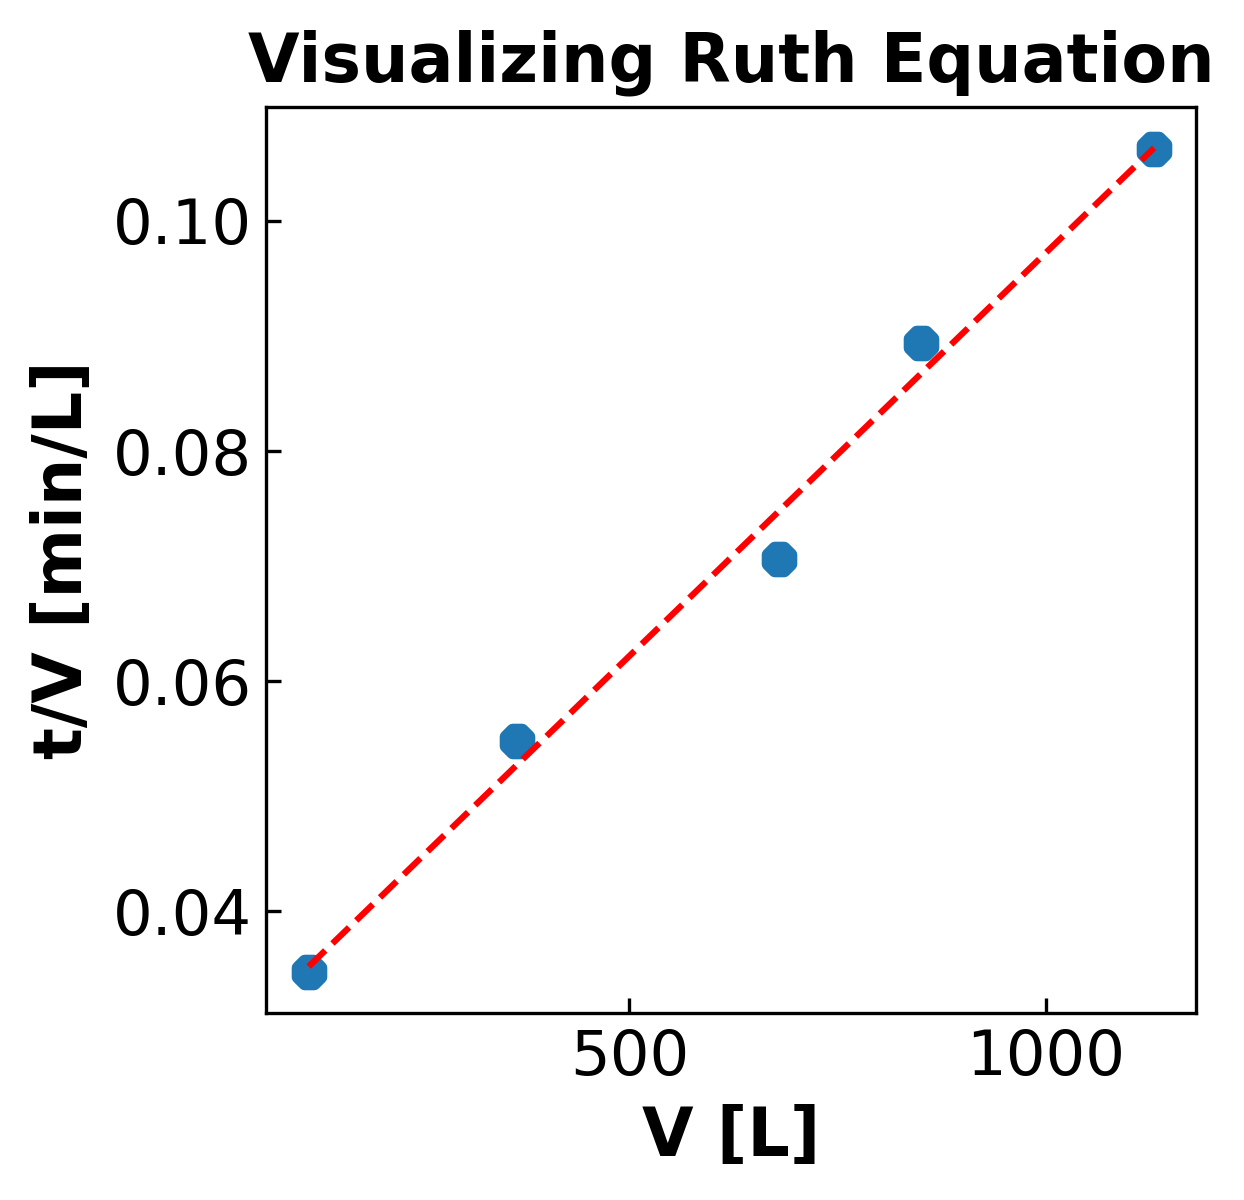

In [ ]:
#Make a scatter plot
# Add your solution here

#Calculate the trendline equation
z = np.polyfit(V, t_over_V, 1)
p = np.poly1d(z)

#Plot the trendline and display equation as title
plt.plot(V, p(V), "r--")
print("The equation of the linear trendline is:","y=%.6fx+%.6f"%(z[0],z[1]))

plt.show()

The title of the graph is the equation of the linear regression line. Use it to store the value of the Ruth coefficient in the variable `K`. Additionally convert the Ruth coefficient to SI units and store in the variable `K_SI`. Note that the slope of the linear trendline is stored in `z[0]`.

In [ ]:
#Calculating K using slope from graph
# Add your solution here

The Ruth coefficient is 0.00023792325864104675 m^6 / s


Use the Ruth coefficient to solve for the pressure drop across the filter, $ΔP$, and store it in the variable `deltaP`.

In [ ]:
#Constants from the problem statement
alpha = 4 #m/kg
C = 1920 #kg/m^3
mu = 2.9E-3 #kg/m*s
A = 0.28 #m^2
gc = 9.8 #kgf / kg*m *s^2

# Add your solution here

The pressure drop is 0.0034484503959635255 N/m^2


How can we use the plot from 1.4 to illustrate our transformed data?

## Determine the Filter Medium Resistance

Calculate the value of $r_{m}$ from the y intercept in Figure 1.4 given:

$y$ $intercept = \frac{2V_{0}}{K}$

$r_{m} = \frac{𝛼V_{0}C}{A}$

Use the y-intercept from the Ruth equation plot to determine the resistance of the filter medium $r_{m}$ and store it in the variable `r_m`.

In [ ]:
# Add your solution here

print("The resistance of the filter medium is", r_m, "m^-1")

The resistance of the filter medium is 5317.806000864924 m^-1


## Determine the Size of the Filter 

For the same pressure drop, determine the size of the filter to process 4000 L of cell suspension in 20 minutes.

> **Hint**: Use the Ruth equation to calculate the required area using:
$V^{2} + 2VV_{0} = Kt $

where $K = (\frac{2A^{2}}{𝛼C𝜇})Δpg_{c}$ and $V_{0} = \frac{r_{m}}{𝛼C}A$. 

**Record your answer using paper and pencil.**


Use your values of $V$, $ΔP$, and $t$ to determine the size of the filter. <br>
>**Hint**: Reformat the Ruth equation to be in terms of surface area only. This should produce a quadratic function. Solve the quadratic equation.

**Pencil and Paper Solution:**

$$\left[\left(\frac{2A^{2}}{𝛼C𝜇}\right)Δpg_{c}\right](t) - 2V\left(\frac{r_{m}}{𝛼C}A\right) -V^2 = 0$$

$$3.59A^2-5.54A -8 = 0$$

$$A = 2.45 m^2$$

Let's use Python as a calculator to check our answer.

In [ ]:
# Add your solution here

print("The possible areas of the filter are:", root1,root2,"m^2")

The possible areas of the filter are: 2.4519924278922605 -0.9088169404270792 m^2


Only one root is positive, and since we cannot have a negative area, the positive root must be the solution.

## Pressure Drop Optimization

Lets say we wanted to reduce the pressure drop in the system by changing the flow rate of the filtrate. Inuitively, we can predict that an increase in velocity of the fitlrate across the filter will increase the pressure drop - but by how much?

Use the original dataset and modulate it in such a way that the pressure drop decreases when the rest of the analysis is performed.
<br>

> **Hint**: we can't speed up or slow down time, so we will have to change the flowrate.

Now multiply the original list `V` by a scalar to change the data uniformly. Store the scaled data in the list `alt_V`.

In [ ]:
#use a hypothetical scaling factor

# Add your solution here

print("The scaled flowrate data is:", alt_V,"L/min")

The scaled flowrate data is: [1.1500000000000001, 3.65, 6.8, 8.5, 11.3] L/min


Write a `for` loop that repeats this analysis until the data produces the desired pressure drop for the system. Print how many iterations it takes to find your answer. Hint: your previous code will come in handy here! Your target $ΔP$ is $0.002 N/m^{2}$.

`np.polyfit` and `np.poly1d` are useful tools for formulating linear trendlines using `numpy` arrays. More information is available here: (https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)


In [ ]:
# Add your solution here

#report iterations
print("The analysis took", count," iterations at a factor of", factor)
print("The Ruth coefficient is", K_SI)

The pressure drop is 0.0033798262330838502 N/m^2
The pressure drop is 0.0033118917602833696 N/m^2
The pressure drop is 0.0032446469775620794 N/m^2
The pressure drop is 0.003178091884919984 N/m^2
The pressure drop is 0.0031122264823570814 N/m^2
The pressure drop is 0.0030470507698733703 N/m^2
The pressure drop is 0.002982564747468853 N/m^2
The pressure drop is 0.0029187684151435285 N/m^2
The pressure drop is 0.0028556617728973943 N/m^2
The pressure drop is 0.0027932448207304557 N/m^2
The pressure drop is 0.0027315175586427073 N/m^2
The pressure drop is 0.002670479986634154 N/m^2
The pressure drop is 0.0026101321047047924 N/m^2
The pressure drop is 0.002550473912854621 N/m^2
The pressure drop is 0.002491505411083646 N/m^2
The pressure drop is 0.0024332265993918627 N/m^2
The pressure drop is 0.0023756374777792718 N/m^2
The pressure drop is 0.002318738046245873 N/m^2
The pressure drop is 0.0022625283047916682 N/m^2
The pressure drop is 0.0022070082534166547 N/m^2
The pressure drop is 0.002

The code above solved for a root using direct iteration, but it can also be done using Newton's method. Consider the following function needed to perform root-finding using Newton's method. This function and additional information on Newton's method can be found in this notebook: (https://ndcbe.github.io/data-and-computing/notebooks/06/Newton-Raphson-Method-in-One-Dimension.html)

In [ ]:
def newton(f,fprime,x0,epsilon=1.0e-6, LOUD=False, max_iter=50):
    """Find the root of the function f(x) via Newton-Raphson method
    Args:
        f: the function, in canoncial form, we want to fix the root of [Python function]
        fprime: the derivative of f [Python function]
        x0: initial guess [float]
        epsilon: tolerance [float]
        LOUD: toggle on/off print statements [boolean]
        max_iter: maximum number of iterations [int]
        
    Returns:
        estimate of root [float]
    """
    
    assert callable(f), "Warning: 'f' should be a Python function"
    assert callable(fprime), "Warning: 'fprime' should be a Python function"
    assert type(x0) is float or type(x0) is int, "Warning: 'x0' should be a float or integer"
    assert type(epsilon) is float, "Warning: 'eps' should be a float"
    assert type(max_iter) is int, "Warning: 'max_iter' should be an integer"
    assert max_iter >= 0, "Warning: 'max_iter' should be non-negative"
    
    x = x0
    if (LOUD):
        print("x0 =",x0)
    iterations = 0
    converged = False
    
    # Check if the residual is close enough to zero
    while (not converged and iterations < max_iter):
        
        if (LOUD):
            print("x_",iterations+1,"=",x,"-",f(x),"/",
                  fprime(x),"=",x - f(x)/fprime(x))
        
        #single-variable Newton's method equation
        x = x - f(x)/fprime(x)
        
        # check if converged
        if np.fabs(f(x)) < epsilon:
            converged = True
        
        iterations += 1 
    print("It took",iterations,"iterations")
    
    if not converged:
        print("Warning: Not a solution. Maximum number of iterations exceeded.")
    return x #return estimate of root

Using these functions, determine what the Ruth constant in SI units `K_SI` will be when the pressure drop $ΔP$ is $0.002 N/m^{2}$. 
> **Hint**: Begin by making two functions to satisfy the terms of the Newton's method function: `Nonlinear_function`, which will return the canonical form of the equation we used above to solve for $ΔP$, and `Dnonlinear_function`, which returns the derivative of `Nonlinear function` with respect to the variable being solved for (`K_SI`).

In [ ]:
deltaP = 0.002 #N/m^2

#Constants for system
alpha = 4 #m/kg
C = 1920 #kg/m^3
mu = 2.9E-3 #kg/m*s
A = 0.28 #m^2
gc = 9.8 #kgf / kg*m *s^2

# Add your solution here
root = newton(Nonlinear_function,Dnonlinear_function,1,LOUD=True,max_iter=15)
print(root)

x0 = 1
x_ 1 = 1 - -14.491960849645977 / -14.493960849645978 = 0.00013798850574719967
It took 1 iterations
0.00013798850574719967


In other systems, Newton's method will take several iterations to converge to a solution. Why do you think our system requires only one iteration to be solved?

## Discussion Questions

For the following questions, answer with 2-3 sentences each.

1. How does setting up the mathematical model help us solve the problem?

2. Can we define the Ruth equation without understanding the mathematical relationship between the variables?

3. Why is the plot useful for understanding the relationship between the data? How does the plot help us determine the filter medium resistance?

4. Why is it important that the pressure drop is the same when determining the size of the filter?

5. What can we infer about the effect of filter medium resistance on yeast cake size over time?

6. How can the filter be optimized to reduce pressure drop?

7. This problem assumes a homogeneous slurry being passed through the filter. What effect would an unevenly distributed or clumpy mixture have on the properties of the filter? How would the plot derived in Section 1.4 change?

